In [81]:
# Lets import all the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [82]:
# Read The Data file

df=pd.read_csv('bbc-text.csv')

In [83]:
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [84]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [85]:
df.dtypes

category    object
text        object
dtype: object

In [86]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

C:\Users\kartik karande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

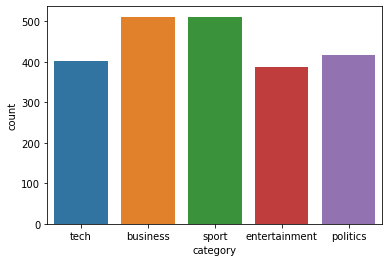

In [87]:
sns.countplot(df.category)

In [88]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [89]:
df.isna().sum()

category    0
text        0
dtype: int64

In [90]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = space.sub(' ', text)
    text = symbols.sub('', text) 
    text = text.replace('x', '')

    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text

In [91]:
df['text']=df['text'].apply(clean_text)

In [92]:
df['text'][4]

'ocean twelve raids bo office ocean twelve crime caper sequel starring george clooney brad pitt julia roberts gone straight number one us bo office chart took 408m 21m weekend ticket sales according studio estimates sequel follows master criminals try pull three major heists across europe knocked last week number one national treasure third place wesley snipes blade trinity second taking 161m 84m rounding top five animated fable polar epress starring tom hanks festive comedy christmas kranks ocean twelve bo office triumph marks fourthbiggest opening december release us three films lord rings trilogy sequel narrowly beat 2001 predecessor ocean eleven took 381m 198m opening weekend 184m 958m total remake 1960s film starring frank sinatra rat pack ocean eleven directed oscarwinning director steven soderbergh soderbergh returns direct hit sequel reunites clooney pitt roberts matt damon andy garcia elliott gould catherine zetajones joins allstar cast fun good holiday movie said dan fellman 

In [93]:
g=[]
for i in df['text']:
    g.append(i)

In [94]:
len(g)

2225

In [95]:
len(g[4])

1207

In [96]:
maxl=max([len(s) for s in g])

In [97]:
maxl

16201

In [98]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32485 unique tokens.


In [99]:
# The maximum length of our sequences is 16000 plus which so big 
# so we will keep the sequence upto 3000 and padd the further sequence

In [100]:
X=tokenizer.texts_to_sequences(df['text'].values)

In [101]:
X=pad_sequences(X,maxlen=3000)

In [102]:
X.shape

(2225, 3000)

In [103]:
Y=pd.get_dummies(df['category'],columns=df['category']).values

In [104]:
len(Y)

2225

In [105]:
df.head()

,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldcom...
2,sport,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle fa cup premiership side...
4,entertainment,ocean twelve raids bo office ocean twelve crim...


In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2002, 3000) (2002, 5)
(223, 3000) (223, 5)


In [107]:
model=Sequential()
model.add(Embedding(50000,100,input_length=3000))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3000, 100)         5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 3000, 100)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=7, batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
 4/29 [===>..........................] - ETA: 42:44 - loss: 1.6079 - accuracy: 0.2266

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();


In [ ]:
new_complaint = ['Cricket Australia is set to begin the team’s pre-season later this month under a set of new training protocols devised for the safety of players amid the COVID-19 pandemic.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=3000)
pred = model.predict(padded)
labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])